### Sample: 3D display, all in Java

First, set the classpath with the right jar. This `jar` contains the statistical functions, system resolution and other linear algebra features, as well as the graphic library we use to display the curves.

This jar is built from the root of this repository, using the following command:
```
$ ./gradlew shadowJar --parallel
```

In [1]:
%classpath add jar "../build/libs/Algebra-1.0-all.jar"

In [2]:
// Verify if the classpath above is taken in account
import gsg.SwingUtils.Box3D;
import gsg.VectorUtils;

import javax.swing.*;
import java.awt.*;
import java.awt.event.ActionEvent;
import java.util.function.Consumer;
import java.util.function.Function;

Where we are:

In [3]:
System.out.println(String.format("Running from folder %s", System.getProperty("user.dir")));
System.out.println(String.format("Java version %s", System.getProperty("java.version")));

Running from folder /Users/olivierlediouris/repos/raspberry-coffee/Algebra/jupyter
Java version 11.0.8


### Now create a 3D box, with several non-default options
The eye/camera is looking at the point `(0, 0, 0)`, its position is defined in the code of `Box3D` by
```
    private double rotOnZ =  40d;
    private double rotOnY =   0d;
    private double rotOnX = -10d;
```
Those parameters have getters and setters.

In [4]:
Box3D box3D = new Box3D();
// Do something specific here.
Consumer<Graphics2D> afterDrawer = g2d -> {
    // Draw a Pyramid
    // 1 - Define its vertex
    VectorUtils.Vector3D topV3 = new VectorUtils.Vector3D(1, -0.5, 2);
    VectorUtils.Vector3D bottomLeftV3 = new VectorUtils.Vector3D(-2, 2, -2);
    VectorUtils.Vector3D bottomRightV3 = new VectorUtils.Vector3D(2, 2.3, -2.1);
    VectorUtils.Vector3D bottomBackV3 = new VectorUtils.Vector3D(2, -2, -2.0);
    // Rotate them
    VectorUtils.Vector3D rotatedTop = VectorUtils.rotate(topV3,
            Math.toRadians(box3D.getRotOnX()),
            Math.toRadians(box3D.getRotOnY()),
            Math.toRadians(box3D.getRotOnZ()));
    VectorUtils.Vector3D rotatedLeft = VectorUtils.rotate(bottomLeftV3,
            Math.toRadians(box3D.getRotOnX()),
            Math.toRadians(box3D.getRotOnY()),
            Math.toRadians(box3D.getRotOnZ()));
    VectorUtils.Vector3D rotatedRight = VectorUtils.rotate(bottomRightV3,
            Math.toRadians(box3D.getRotOnX()),
            Math.toRadians(box3D.getRotOnY()),
            Math.toRadians(box3D.getRotOnZ()));
    VectorUtils.Vector3D rotatedBack = VectorUtils.rotate(bottomBackV3,
            Math.toRadians(box3D.getRotOnX()),
            Math.toRadians(box3D.getRotOnY()),
            Math.toRadians(box3D.getRotOnZ()));
    // Plot!
    Function<VectorUtils.Vector3D, Point> transformer = box3D.getTransformer();
    Point topPoint = transformer.apply(rotatedTop);
    Point leftPoint = transformer.apply(rotatedLeft);
    Point rightPoint = transformer.apply(rotatedRight);
    Point backPoint = transformer.apply(rotatedBack);

    Color facesColor = new Color(0, 255, 0, 60);
    g2d.setStroke(new BasicStroke(1));
    g2d.setColor(facesColor);
    Polygon triangle1 = new Polygon(new int[] {topPoint.x, leftPoint.x, rightPoint.x},
            new int[] {topPoint.y, leftPoint.y, rightPoint.y},
            3);
    g2d.fillPolygon(triangle1);
    g2d.setColor(Color.BLACK);
    g2d.drawPolygon(triangle1);

    g2d.setColor(facesColor);
    Polygon triangle2 = new Polygon(new int[] {topPoint.x, leftPoint.x, backPoint.x},
            new int[] {topPoint.y, leftPoint.y, backPoint.y},
            3);
    g2d.fillPolygon(triangle2);
    g2d.setColor(Color.BLACK);
    g2d.drawPolygon(triangle2);

    g2d.setColor(facesColor);
    Polygon triangle3 = new Polygon(new int[] {topPoint.x, rightPoint.x, backPoint.x},
            new int[] {topPoint.y, rightPoint.y, backPoint.y},
            3);
    g2d.fillPolygon(triangle3);
    g2d.setColor(Color.BLACK);
    g2d.drawPolygon(triangle3);

    g2d.setColor(facesColor);
    Polygon triangle4 = new Polygon(new int[] {leftPoint.x, rightPoint.x, backPoint.x},
            new int[] {leftPoint.y, rightPoint.y, backPoint.y},
            3);
    g2d.fillPolygon(triangle4);
    g2d.setColor(Color.BLACK);
    g2d.drawPolygon(triangle4);
};
box3D.setAfterDrawer(afterDrawer);

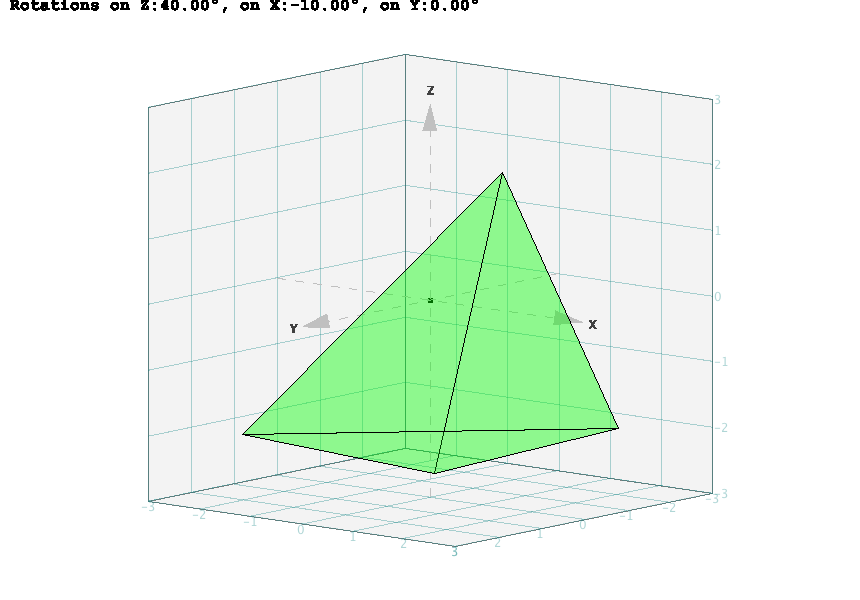

In [5]:
box3D.getImage();

Change rotation angles, re-display

In [6]:
box3D.setRotOnZ(50d);
box3D.setRotOnX(-20d);

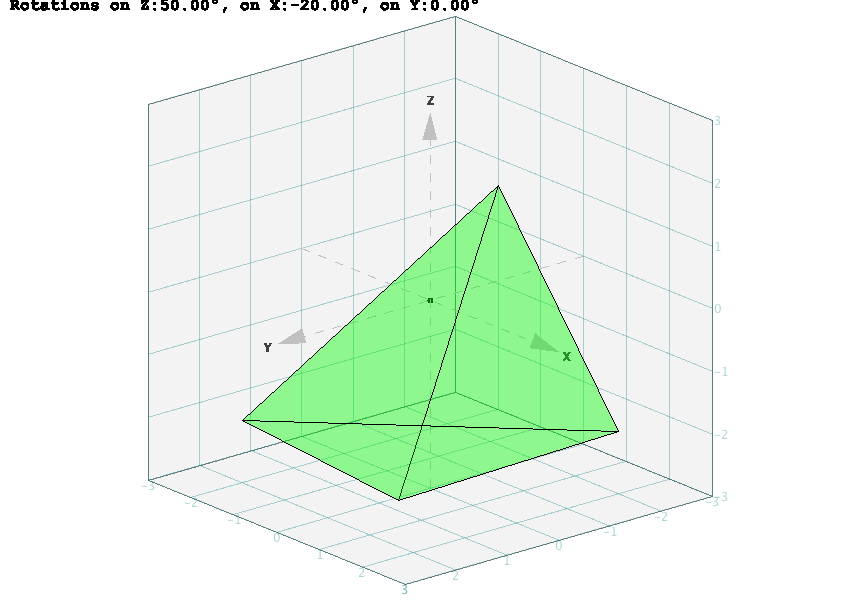

In [7]:
box3D.getImage();

---